## MODELOS DE RECONOCIMIENTO FACIAL
En este notebook exploraremos el funcionamiento de los tres modelos propuestos en la tarea del reconocimiento de caras. Los metodos de eigenfaces y eogenfaces bayesiano se analizaran en la base de datos de Yale B y en la de VGGfaces, y el de CNN se usará solo para la base de datos de VGG.
Las funciones usadas en los metodos basados en PCA están en los archivos de eigenfaces_utils.
La optimización de parametros en los metodos de PCA se llevan a cabo en el archivo separado de cross_validation.

In [5]:
'Carga de imagenes'

import numpy as np
import sys
sys.path.append("/kaggle/input/modelospca/other/default/1/")
from eigenfaces_utils import load_images
training_ratio = 0.8
image_size = (130, 130) 
data = np.load("/kaggle/input/casiawebfaces/casiafull.npz")
train_images, test_images, train_labels, test_labels = data["train_images"], data["test_images"],data["train_labels"],data["test_labels"]
train_images, test_images = np.array(train_images), np.array(test_images)

print("Carga finalizada")

Carga finalizada


In [2]:
'METODO MEDIANTE PCA'
from eigenfaces_utils import project_images,predict_single_image
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
num_components = 350 #Numero de components proyectados en el espacio de eigenfaces

# Calcular eigenfaces
#eigenfaces, mean= compute_eigenfaces(train_images,image_size)
#np.savez("C:/Users/Unax/Desktop/LegacyTFG/Database/eigenfaces_NEW.npz", eigenfaces=eigenfaces, mean=mean)
#data = np.load("/kaggle/input/eigencasia200/eigenfaces_CASIAn200.npz")
#eigenfaces,mean=data["eigenfaces"], data["mean"]
def compute_eigenfaces(train_images, image_size,batch_size, n_components):
    N, h, w = len(train_images), image_size[0], image_size[1]
    X = np.reshape(train_images, (N, h * w))  # Convertimos a matriz 2D (N, d)

    mean = np.mean(X, axis=0)  # Calculamos la media
    X_std = X - mean  # Centramos los datos

    ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    ipca.fit(X_std)  # Ajustamos PCA en lotes pequeños

    eigenfaces = ipca.components_  # Eigenfaces obtenidas

    return eigenfaces, mean
print("Entrenamiento finalizado") 
num_components_values = [350]
# Seleccionar subconjunto de test variado
test_sample_size = min(500, len(test_images)) 
selected_indices = random.sample(range(len(test_images)), test_sample_size)
test_images_sample = [test_images[i] for i in selected_indices]
test_labels_sample = [test_labels[i] for i in selected_indices]

accuracies = []

# Evaluación para diferentes valores de num_components
for num_components in num_components_values:
    print(f"Evaluando para num_components = {num_components}")
    eigenfaces, mean= compute_eigenfaces(train_images,image_size,batch_size=500, n_components=350)
    trainE = project_images(train_images, mean, eigenfaces, num_components, image_size)
    
    predicted_labels = [predict_single_image(img, mean, eigenfaces, trainE, train_labels, image_size, num_components) 
                        for img in test_images_sample]
    accuracy = np.mean(np.array(predicted_labels) == np.array(test_labels_sample))
    accuracies.append(accuracy)
    print(f"Accuracy para {num_components} componentes: {accuracy * 100:.2f}%")

# Graficar resultados
plt.figure(figsize=(8, 6))
plt.plot(num_components_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Exactitud')
plt.title('Exactitud en función del Número de Componentes')
plt.grid()
plt.show()



Entrenamiento finalizado
Evaluando para num_components = 350


KeyboardInterrupt: 

In [5]:
'METODO MEDIANTE PCA BAYESIANO'
import numpy as np
import os
from PIL import Image
import sys
import random
sys.path.append("/kaggle/input/modelospca/other/default/1/")
from eigenfaces_bayes_utils import calculate_class_statistics, load_images, compute_eigenfaces, project_images,predict_single_image_bayes

num_components = 30 
 #Calcular eigenfaces
#eigenfaces, mean = compute_eigenfaces(train_images,image_size)
#np.savez("D:/Universidad/TFG IE/Legacy code/Database/eigenfaces_PCAfull.npz", eigenfaces=eigenfaces, mean=mean)
data = np.load("/kaggle/input/eigencasia200/eigenfaces_CASIAn200.npz")
eigenfaces,mean=data["eigenfaces"], data["mean"]
print("Entrenamiento finalizado") 
# Proyectar imágenes de entrenamiento
#trainE = project_images(train_images, mean, eigenfaces, num_components,image_size)

# Calcular estadísticas de las clases
#class_means, class_covariances = calculate_class_statistics(trainE, train_labels)
print("Proyeccion y stats finalizado") 

num_components_values = [120]
# Seleccionar subconjunto de test variado
test_sample_size = 500 
selected_indices = random.sample(range(len(test_images)), test_sample_size)
test_images_sample = [test_images[i] for i in selected_indices]
test_labels_sample = [test_labels[i] for i in selected_indices]

accuracies = []

# Evaluación para diferentes valores de num_components
for num_components in num_components_values:
    print(f"Evaluando para num_components = {num_components}")
    #eigenfaces, mean= compute_eigenfaces(train_images,image_size,batch_size=200, n_components=num_components)
    trainE = project_images(train_images, mean, eigenfaces, num_components, image_size)
    class_means, class_covariances = calculate_class_statistics(trainE, train_labels)
    predicted_labels =  [predict_single_image_bayes(img, mean, eigenfaces, class_means, class_covariances, image_size, num_components) 
                        for img in test_images_sample]
    accuracy = np.mean(np.array(predicted_labels) == np.array(test_labels_sample))
    accuracies.append(accuracy)
    print(f"Accuracy para {num_components} componentes: {accuracy * 100:.2f}%")

# Graficar resultados
plt.figure(figsize=(8, 6))
plt.plot(num_components_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Exactitud')
plt.title('Exactitud en función del Número de Componentes')
plt.grid()
plt.show()

Entrenamiento finalizado
Proyeccion y stats finalizado
Evaluando para num_components = 120
Accuracy para 120 componentes: 13.80%


NameError: name 'plt' is not defined

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


947/947 ━━━━━━━━━━━━━━━━━━━━ 105s 97ms/step - accuracy: 0.0031 - loss: 6.2527 - val_accuracy: 0.0069 - val_loss: 6.1720 - learning_rate: 0.0100
Epoch 2/80
947/947 ━━━━━━━━━━━━━━━━━━━━ 87s 91ms/step - accuracy: 0.0077 - loss: 6.1522 - val_accuracy: 0.0163 - val_loss: 5.8623 - learning_rate: 0.0100
Epoch 3/80
947/947 ━━━━━━━━━━━━━━━━━━━━ 89s 93ms/step - accuracy: 0.0129 - loss: 5.9338 - val_accuracy: 0.0277 - val_loss: 5.6119 - learning_rate: 0.0100
Epoch 4/80
947/947 ━━━━━━━━━━━━━━━━━━━━ 90s 94ms/step - accuracy: 0.0186 - loss: 5.7652 - val_accuracy: 0.0415 - val_loss: 5.3904 - learning_rate: 0.0100
Epoch 5/80
947/947 ━━━━━━━━━━━━━━━━━━━━ 89s 93ms/step - accuracy: 0.0268 - loss: 5.5975 - val_accuracy: 0.0613 - val_loss: 5.0686 - learning_rate: 0.0100
Epoch 6/80
947/947 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.0355 - loss: 5.3601 - val_accuracy: 0.1032 - val_loss: 4.6325 - learning_rate: 0.0100
Epoch 7/80
947/947 ━━━━━━━━━━━━━━━━━━━━ 88s 92ms/step - accuracy: 0.0501 - loss: 5.102

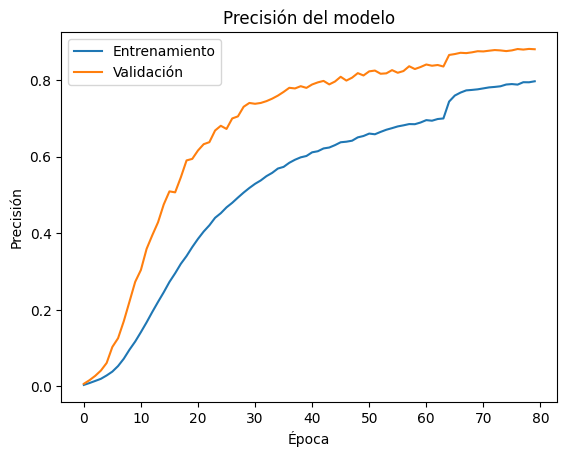

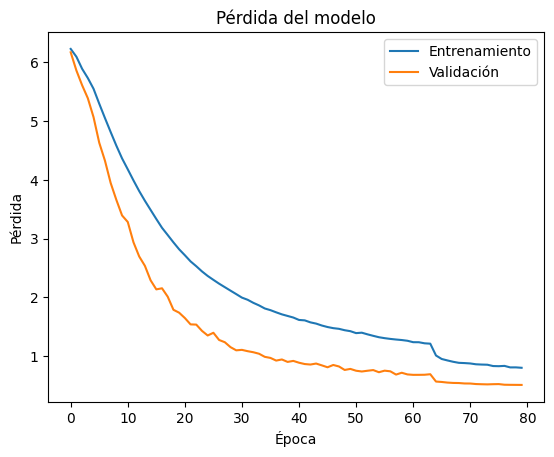

In [6]:
'METODO MEDIANTE CNN'

# Importar las librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocesamiento de imágenes
image_size = (130, 130)
input_shape = (130, 130, 1)
train_images = np.array(train_images)  
test_images = np.array(test_images) 

# Normalización
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape(-1, 130, 130, 1)
test_images = test_images.reshape(-1, 130, 130, 1)

# Codificación de etiquetas
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)
num_classes = len(np.unique(train_labels))
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# Dividir entrenamiento en train y validación
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, stratify=train_labels, random_state=42
)

# Modelo CNN
model = keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-5, mode='min')

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train, y_train, batch_size=64)

# Entrenamiento
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluación final sobre el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

# Guardar el modelo
model.save("/kaggle/working/modelo_CASIAV2_AUGSGD.keras")
print(history.history.keys())
# Graficar resultados
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
